### RMSE for each proability level for pie charts SubID = 1 to 22 excluding ###
- are there differences in participantT's estimation of pie probabilities overall and between the pie types????
- differences in error per prob. level in R code /GLM
- Are there significant differences between the mean confidence ratings for pie charts and Experiential Images for each proability level? Kruskall Wallis, Dunn's post hoc test, bonferroni correction - in R code

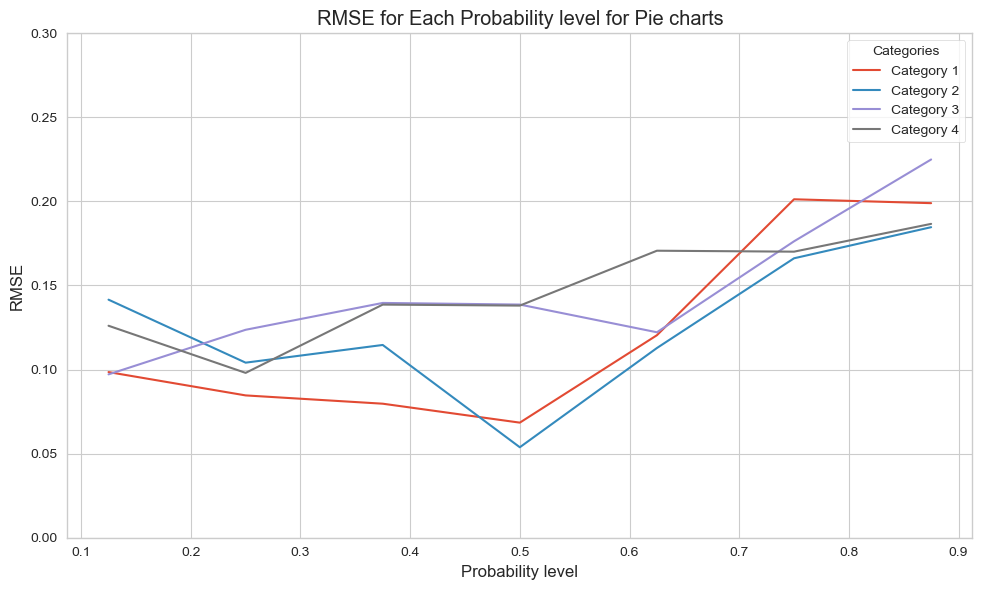

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')

category1 = ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"]
category2 = ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"]
category3 = ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"]
category4 = ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

results_category1 = []
results_category2 = []
results_category3 = []
results_category4 = []

for prob_level in prob_levels:
    prob_results_category1 = []
    prob_results_category2 = []
    prob_results_category3 = []
    prob_results_category4 = []

    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category1)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category1.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category2)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category2.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category3)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category3.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category4)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category4.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    results_category1.extend(prob_results_category1)
    results_category2.extend(prob_results_category2)
    results_category3.extend(prob_results_category3)
    results_category4.extend(prob_results_category4)

results_df_category1 = pd.DataFrame(results_category1)
results_df_category2 = pd.DataFrame(results_category2)
results_df_category3 = pd.DataFrame(results_category3)
results_df_category4 = pd.DataFrame(results_category4)

plt.style.use('ggplot')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df_category1, x='Probability_Level', y='RMSE', label='Category 1', palette='bright')
sns.lineplot(data=results_df_category2, x='Probability_Level', y='RMSE', label='Category 2', palette='bright')
sns.lineplot(data=results_df_category3, x='Probability_Level', y='RMSE', label='Category 3', palette='bright')
sns.lineplot(data=results_df_category4, x='Probability_Level', y='RMSE', label='Category 4', palette='bright')

plt.xlabel('Probability level')
plt.ylabel('RMSE')
plt.title('RMSE for Each Probability level for Pie charts')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.tight_layout()
plt.ylim(0, 0.3)
plt.show()


In [ ]:
image_categories = [
    "'Fire'", "'Cycle'", "'Menue'", "'Mark'", "'Intersection'", "'Magnet'"
]

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]


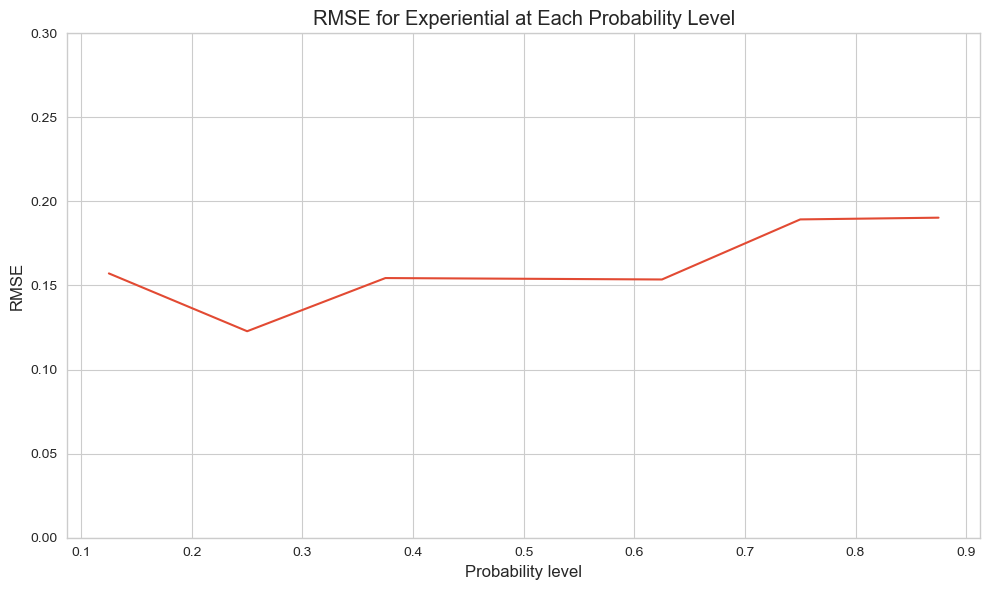

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')

prob_levels = [0.125, 0.25, 0.375, 0.625, 0.75, 0.875]

results = []

for prob_level in prob_levels:
    prob_results = []

    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    image_ratings = prob_df['sliderResponsesArrayEXP'] / 100
    image_actual_values = prob_df['accurate_rating']

    if not image_ratings.empty:
        ae = abs(image_ratings - image_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    results.extend(prob_results)

results_df = pd.DataFrame(results)

plt.style.use('ggplot')
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Probability_Level', y='RMSE', palette='bright')
plt.xlabel('Probability level')
plt.ylabel('RMSE')
plt.title('RMSE for Experiential at Each Probability Level')
plt.xticks(rotation=0)
plt.tight_layout()
plt.ylim(0, 0.3)
plt.show()


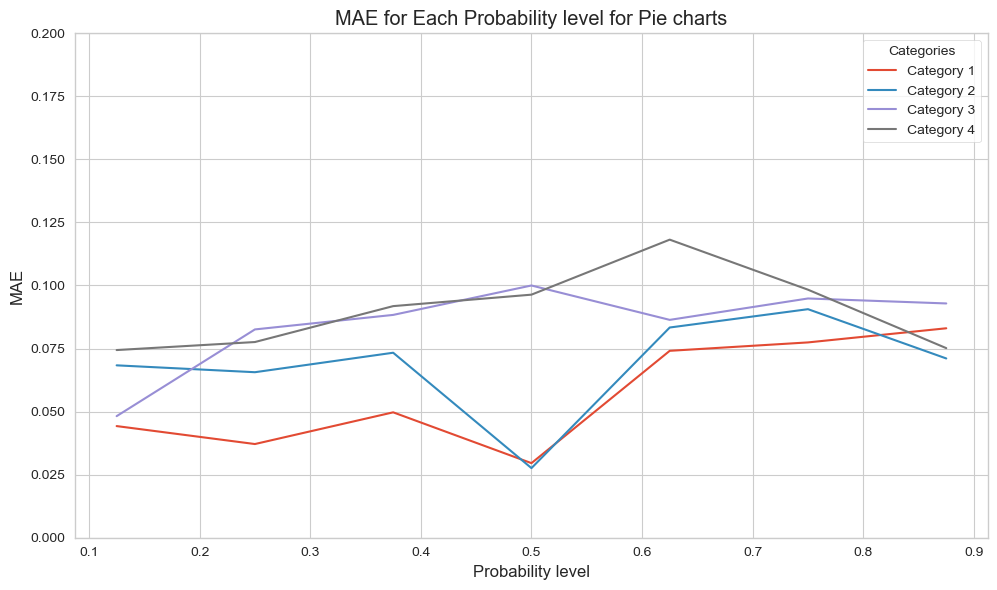

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')

category1 = ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"]
category2 = ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"]
category3 = ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"]
category4 = ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

results_category1 = []
results_category2 = []
results_category3 = []
results_category4 = []

for prob_level in prob_levels:
    prob_results_category1 = []
    prob_results_category2 = []
    prob_results_category3 = []
    prob_results_category4 = []

    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category1)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mae = ae.mean()
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category1.append({
            "Probability_Level": prob_level,
            "MAE": mae
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category2)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mae = ae.mean()
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category2.append({
            "Probability_Level": prob_level,
            "MAE": mae
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category3)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mae = ae.mean()
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category3.append({
            "Probability_Level": prob_level,
            "MAE": mae
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category4)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mae = ae.mean()
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category4.append({
            "Probability_Level": prob_level,
            "MAE": mae
        })

    results_category1.extend(prob_results_category1)
    results_category2.extend(prob_results_category2)
    results_category3.extend(prob_results_category3)
    results_category4.extend(prob_results_category4)

results_df_category1 = pd.DataFrame(results_category1)
results_df_category2 = pd.DataFrame(results_category2)
results_df_category3 = pd.DataFrame(results_category3)
results_df_category4 = pd.DataFrame(results_category4)

plt.style.use('ggplot')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df_category1, x='Probability_Level', y='MAE', label='Category 1', palette='bright')
sns.lineplot(data=results_df_category2, x='Probability_Level', y='MAE', label='Category 2', palette='bright')
sns.lineplot(data=results_df_category3, x='Probability_Level', y='MAE', label='Category 3', palette='bright')
sns.lineplot(data=results_df_category4, x='Probability_Level', y='MAE', label='Category 4', palette='bright')

plt.xlabel('Probability level')
plt.ylabel('MAE')
plt.title('MAE for Each Probability level for Pie charts')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.tight_layout()
plt.ylim(0, 0.2)
plt.show()


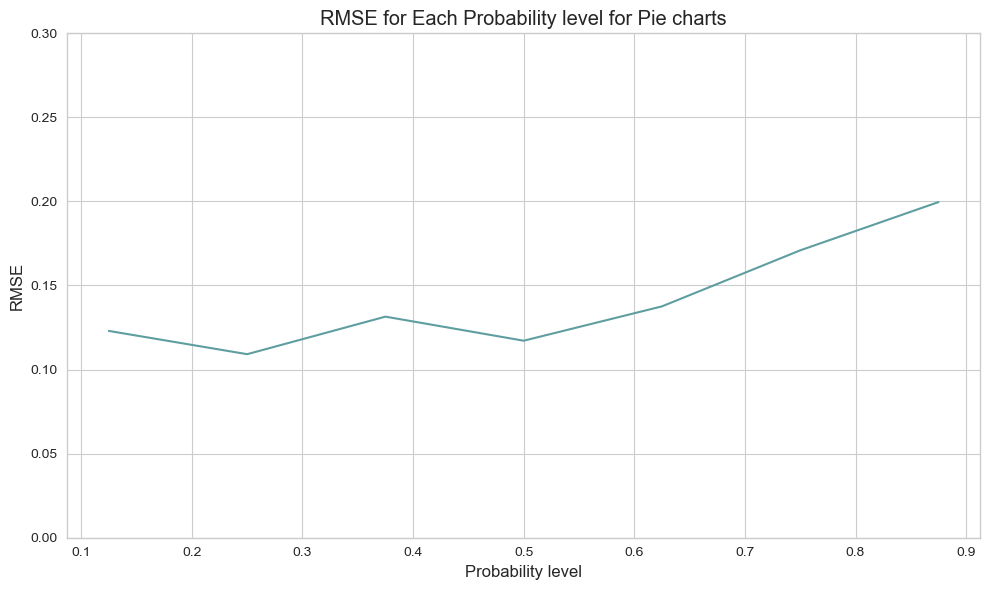

Probability Level: 0.125, RMSE: 0.12296731108696973
Probability Level: 0.25, RMSE: 0.10913340922971762
Probability Level: 0.375, RMSE: 0.13146705236897133
Probability Level: 0.5, RMSE: 0.11714620063507106
Probability Level: 0.625, RMSE: 0.13757917830482308
Probability Level: 0.75, RMSE: 0.17091110572635707
Probability Level: 0.875, RMSE: 0.19962528027595242
Kruskal-Wallis Test:
KruskalResult(statistic=6.0, pvalue=0.42319008112684364)
Dunn's Post-Hoc Test:
          0.125     0.250     0.375     0.500     0.625     0.750     0.875
0.125  1.000000  0.512691  0.743421  0.743421  0.512691  0.326109  0.190430
0.250  0.512691  1.000000  0.326109  0.743421  0.190430  0.101707  0.049535
0.375  0.743421  0.326109  1.000000  0.512691  0.743421  0.512691  0.326109
0.500  0.743421  0.743421  0.512691  1.000000  0.326109  0.190430  0.101707
0.625  0.512691  0.190430  0.743421  0.326109  1.000000  0.743421  0.512691
0.750  0.326109  0.101707  0.512691  0.190430  0.743421  1.000000  0.743421
0.875  0

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')

all_pie_categories = [
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
     "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'" ]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
results = []

from scipy import stats

# 1. Filter the data for the current probability level
# 2. Manual RMSE for pies


for prob_level in prob_levels:
    prob_results = []
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mae = ae.mean()
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)

        #sample_size = len(pie_ratings)  
        #standard_error_mae = ae.std() / np.sqrt(sample_size)
        #standard_error_mse = np.sqrt(((ae ** 2).mean() - mse ** 2) / sample_size)
        #standard_error_rmse = np.sqrt(((ae ** 4).mean() - rmse ** 4) / sample_size)

        prob_results.append({
            "Probability_Level": prob_level,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
        })


    results.extend(prob_results)


results_df = pd.DataFrame(results)

plt.style.use('ggplot')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Probability_Level', y='RMSE', palette='bright', color='cadetblue')
plt.xlabel('Probability level')
plt.ylabel('RMSE')
plt.title('RMSE for Each Probability level for Pie charts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.ylim(0, 0.3)
plt.show()

# RMSE values for each probability level
for result in results:
    print(f"Probability Level: {result['Probability_Level']}, RMSE: {result['RMSE']}")

# Kruskal-Wallis test
kruskal_result = kruskal(*[group['RMSE'] for name, group in results_df.groupby('Probability_Level')])
print("Kruskal-Wallis Test:")
print(kruskal_result)

# Dunn's post-hoc
posthoc_dunn_result = posthoc_dunn(results_df, val_col='RMSE', group_col='Probability_Level')
print("Dunn's Post-Hoc Test:")
print(posthoc_dunn_result)



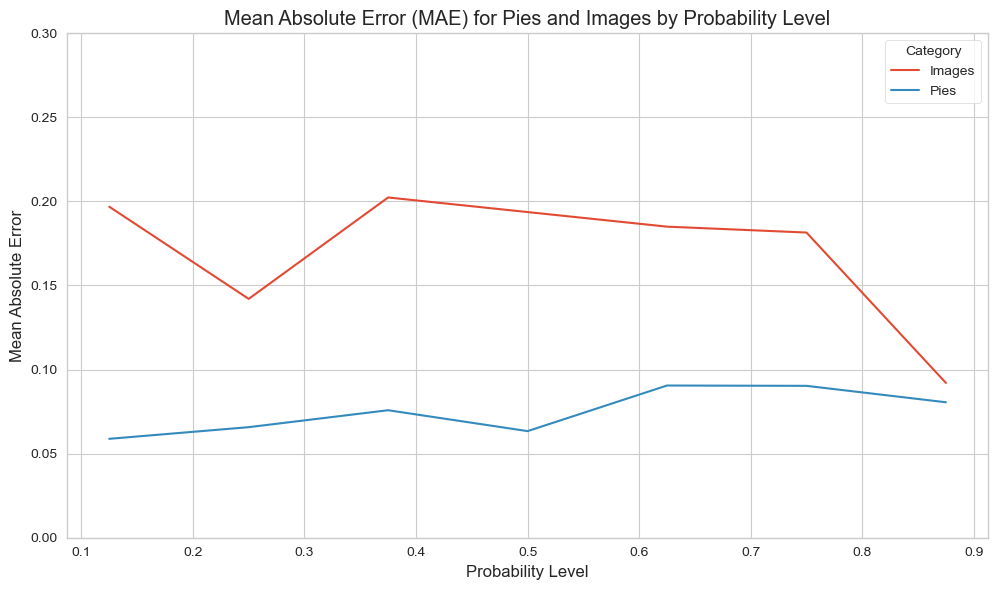

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')


image_categories = [
    "'Fire'", "'Cycle'", "'Menue'", "'Mark'", "'Intersection'", "'Magnet'"
]

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

results = []

for prob_level in prob_levels:
    prob_results = []

    prob_df = df[df['accurate_rating'] == prob_level]

    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    image_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(image_categories)]
    image_ratings = image_df['sliderResponsesArrayEXP'] / 100
    image_actual_values = image_df['accurate_rating']

    if not image_ratings.empty:
        image_mae = mean_absolute_error(image_actual_values, image_ratings)

        prob_results.append({
            "Probability Level": prob_level,
            "Category": "Images",
            "MAE": image_mae
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        pie_mae = mean_absolute_error(pie_actual_values, pie_ratings)

        prob_results.append({
            "Probability Level": prob_level,
            "Category": "Pies",
            "MAE": pie_mae
        })

    results.extend(prob_results)

results_df = pd.DataFrame(results)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='Probability Level', y='MAE', hue='Category', data=results_df, ci='sd', markers=True)
plt.title('Mean Absolute Error (MAE) for Pies and Images by Probability Level')
plt.xlabel('Probability Level')
plt.ylabel('Mean Absolute Error')
plt.ylim(0, 0.5)
plt.legend(title='Category')
plt.tight_layout()
plt.ylim(0, 0.3)
plt.show()


Probability Level: 0.125, Mean: 0.132, Standard Error: 0.007
Probability Level: 0.25, Mean: 0.234, Standard Error: 0.006
Probability Level: 0.375, Mean: 0.395, Standard Error: 0.007
Probability Level: 0.5, Mean: 0.521, Standard Error: 0.006
Probability Level: 0.625, Mean: 0.638, Standard Error: 0.008
Probability Level: 0.75, Mean: 0.726, Standard Error: 0.011
Probability Level: 0.875, Mean: 0.829, Standard Error: 0.012


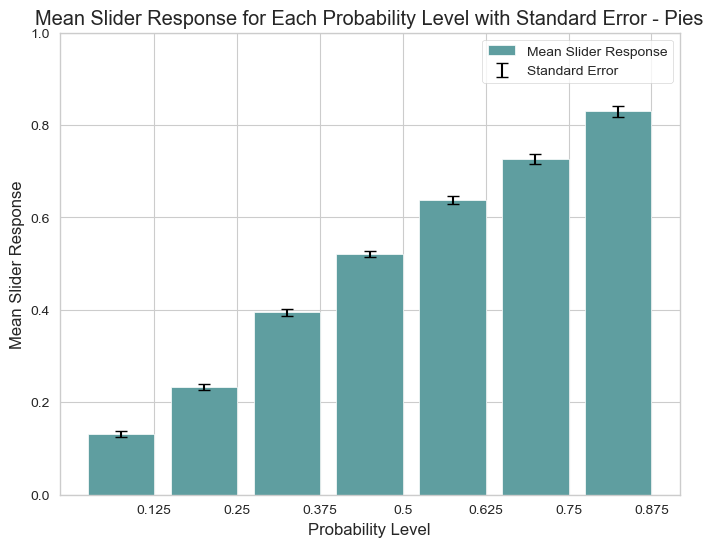

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')
#df = df[(df['SubID'] != 3) & (df['SubID'] != 18)]

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

mean_responses = []
std_errors = []  

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    mean_response = pie_df['sliderResponsesArrayEXP'].mean() / 100
    std_error = pie_df['sliderResponsesArrayEXP'].sem() / 100  
    mean_responses.append(mean_response)
    std_errors.append(std_error)

mean_df = pd.DataFrame({'Probability Level': prob_levels, 'Mean Slider Response': mean_responses, 'Standard Error': std_errors})

for index, row in mean_df.iterrows():
    print(f"Probability Level: {row['Probability Level']}, Mean: {row['Mean Slider Response']:.3f}, Standard Error: {row['Standard Error']:.3f}")

bar_width = 0.8
x = np.arange(len(prob_levels))
bar_positions = x - bar_width / 2
error_bar_positions = x - bar_width / 2

plt.figure(figsize=(8, 6))
plt.bar(bar_positions, mean_df['Mean Slider Response'], width=bar_width, label='Mean Slider Response', color='cadetblue')
plt.errorbar(error_bar_positions, mean_df['Mean Slider Response'], yerr=mean_df['Standard Error'], fmt='none', color='black', capsize=4, label='Standard Error', zorder=5)

plt.xticks(x, mean_df['Probability Level'])

plt.xlabel('Probability Level')
plt.ylabel('Mean Slider Response')
plt.title('Mean Slider Response for Each Probability Level with Standard Error - Pies')
plt.ylim(0, 1)
plt.legend()
plt.show()


Probability Level: 0.125, Mean: 0.285, Standard Error: 0.026
Probability Level: 0.25, Mean: 0.312, Standard Error: 0.022
Probability Level: 0.375, Mean: 0.405, Standard Error: 0.031
Probability Level: 0.625, Mean: 0.679, Standard Error: 0.026
Probability Level: 0.75, Mean: 0.687, Standard Error: 0.026
Probability Level: 0.875, Mean: 0.838, Standard Error: 0.018


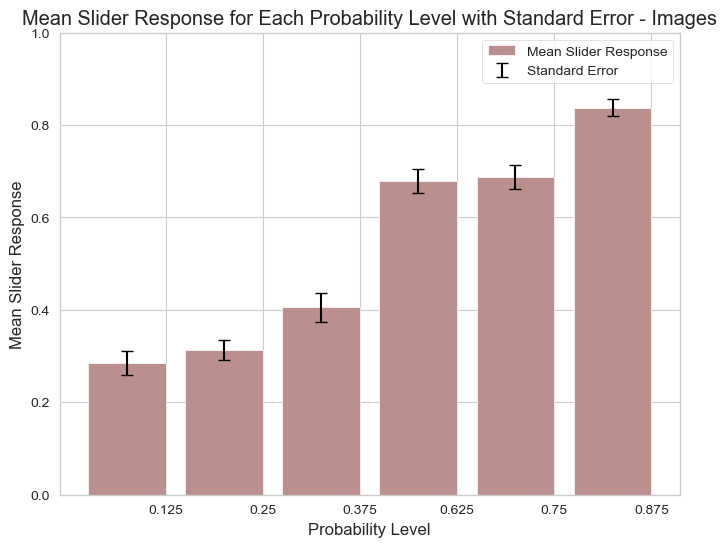

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]

prob_levels = [0.125, 0.25, 0.375, 0.625, 0.75, 0.875]

mean_responses = []
std_errors = []  

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(experiential_image)]
    mean_response = pie_df['sliderResponsesArrayEXP'].mean() / 100
    std_error = pie_df['sliderResponsesArrayEXP'].sem() / 100  
    mean_responses.append(mean_response)
    std_errors.append(std_error)

mean_df = pd.DataFrame({'Probability Level': prob_levels, 'Mean Slider Response': mean_responses, 'Standard Error': std_errors})

for index, row in mean_df.iterrows():
    print(f"Probability Level: {row['Probability Level']}, Mean: {row['Mean Slider Response']:.3f}, Standard Error: {row['Standard Error']:.3f}")

bar_width = 0.8
x = np.arange(len(prob_levels))
bar_positions = x - bar_width / 2
error_bar_positions = x - bar_width / 2

plt.figure(figsize=(8, 6))
plt.bar(bar_positions, mean_df['Mean Slider Response'], width=bar_width, label='Mean Slider Response', color='rosybrown')
plt.errorbar(error_bar_positions, mean_df['Mean Slider Response'], yerr=mean_df['Standard Error'], fmt='none', color='black', capsize=4, label='Standard Error', zorder=5)

plt.xticks(x, mean_df['Probability Level'])

plt.xlabel('Probability Level')
plt.ylabel('Mean Slider Response')
plt.title('Mean Slider Response for Each Probability Level with Standard Error - Images')
plt.ylim(0, 1)
plt.legend()
plt.show()


## Mean Confidence ratings (Likert Scale, 1== Lowest, 5==Highest Conf.) for probability levels of pie charts ##

Probability Level: 0.125, Mean Confidence Ratings: 3.505, Standard Error: 0.075
Probability Level: 0.25, Mean Confidence Ratings: 3.481, Standard Error: 0.064
Probability Level: 0.375, Mean Confidence Ratings: 3.439, Standard Error: 0.053
Probability Level: 0.5, Mean Confidence Ratings: 3.848, Standard Error: 0.053
Probability Level: 0.625, Mean Confidence Ratings: 3.742, Standard Error: 0.043
Probability Level: 0.75, Mean Confidence Ratings: 3.992, Standard Error: 0.046
Probability Level: 0.875, Mean Confidence Ratings: 4.116, Standard Error: 0.050


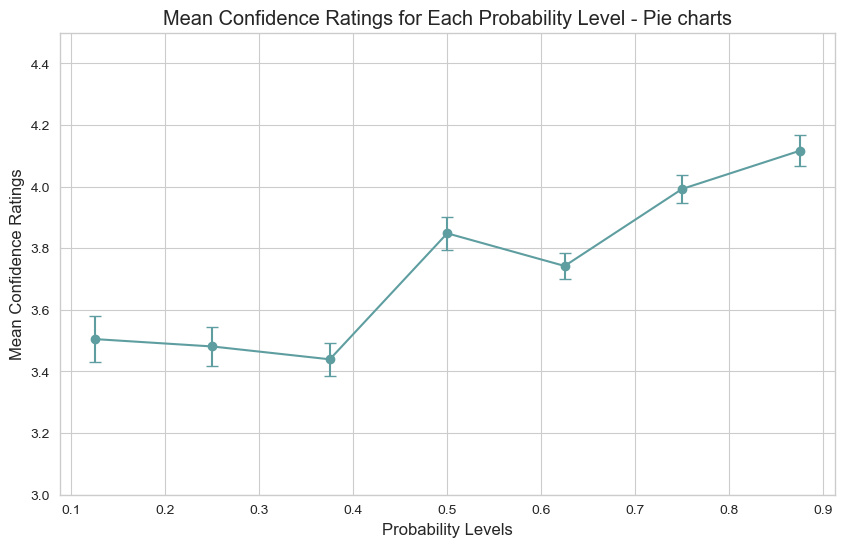

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
     "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

mean_confidence_ratings = []
std_errors = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    
    mean_confidence = pie_df['confidenceLevelsArrayEXP'].mean()
    std_error = pie_df['confidenceLevelsArrayEXP'].sem()
    
    mean_confidence_ratings.append(mean_confidence)
    std_errors.append(std_error)
confidence_df = pd.DataFrame({'Probability Level': prob_levels, 'Mean Confidence Ratings': mean_confidence_ratings, 'Standard Error': std_errors})

# mean and standard error for probability level
for index, row in confidence_df.iterrows():
    print(f"Probability Level: {row['Probability Level']}, Mean Confidence Ratings: {row['Mean Confidence Ratings']:.3f}, Standard Error: {row['Standard Error']:.3f}")

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plt.errorbar(prob_levels, mean_confidence_ratings, yerr=std_errors, marker='o', linestyle='-', color='cadetblue', capsize=4)
plt.xlabel('Probability Levels')
plt.ylabel('Mean Confidence Ratings')
plt.title('Mean Confidence Ratings for Each Probability Level - Pie charts')
plt.grid(True)
plt.ylim(3.0, 4.5)
plt.show()


### Mean Confidence ratings (Likert Scale) for probability levels of different pie chart types (1-4) ###

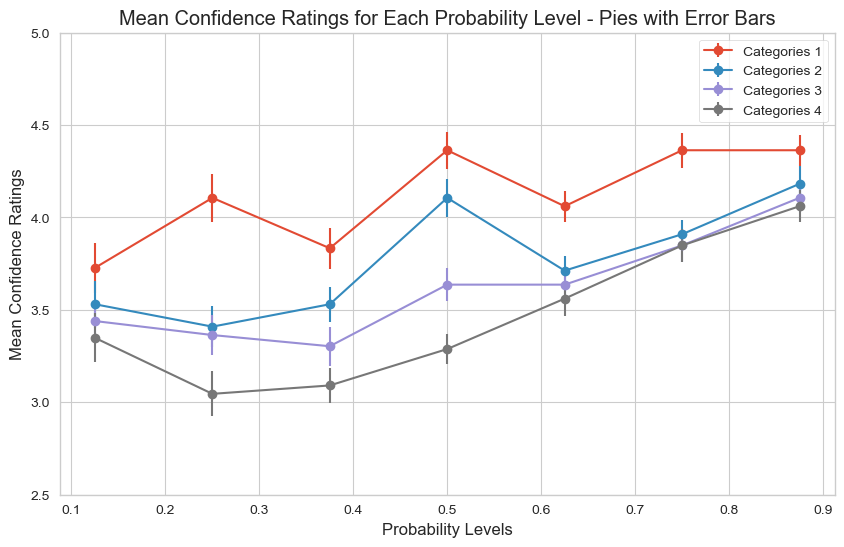

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')


all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

pie_categories_1 = ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"]
pie_categories_2 = ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"]
pie_categories_3 = ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"]
pie_categories_4 = ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

mean_confidence_ratings_1 = []
mean_confidence_ratings_2 = []
mean_confidence_ratings_3 = []
mean_confidence_ratings_4 = []

std_errors_1 = []
std_errors_2 = []
std_errors_3 = []
std_errors_4 = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])

    mean_confidence_1 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_1)]['confidenceLevelsArrayEXP'].mean()
    mean_confidence_2 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_2)]['confidenceLevelsArrayEXP'].mean()
    mean_confidence_3 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_3)]['confidenceLevelsArrayEXP'].mean()
    mean_confidence_4 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_4)]['confidenceLevelsArrayEXP'].mean()

    std_error_1 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_1)]['confidenceLevelsArrayEXP'].sem()
    std_error_2 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_2)]['confidenceLevelsArrayEXP'].sem()
    std_error_3 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_3)]['confidenceLevelsArrayEXP'].sem()
    std_error_4 = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(pie_categories_4)]['confidenceLevelsArrayEXP'].sem()

    mean_confidence_ratings_1.append(mean_confidence_1)
    mean_confidence_ratings_2.append(mean_confidence_2)
    mean_confidence_ratings_3.append(mean_confidence_3)
    mean_confidence_ratings_4.append(mean_confidence_4)

    std_errors_1.append(std_error_1)
    std_errors_2.append(std_error_2)
    std_errors_3.append(std_error_3)
    std_errors_4.append(std_error_4)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plt.errorbar(prob_levels, mean_confidence_ratings_1, yerr=std_errors_1, marker='o', linestyle='-', label='Categories 1')
plt.errorbar(prob_levels, mean_confidence_ratings_2, yerr=std_errors_2, marker='o', linestyle='-', label='Categories 2')
plt.errorbar(prob_levels, mean_confidence_ratings_3, yerr=std_errors_3, marker='o', linestyle='-', label='Categories 3')
plt.errorbar(prob_levels, mean_confidence_ratings_4, yerr=std_errors_4, marker='o', linestyle='-', label='Categories 4')

plt.xlabel('Probability Levels')
plt.ylabel('Mean Confidence Ratings')
plt.title('Mean Confidence Ratings for Each Probability Level - Pies with Error Bars')
plt.legend()
plt.grid(True)
plt.ylim(2.5, 5.0)
plt.show()


## Mean Confidence ratings (Likert Scale) between pie charts and experiential images ##

c:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


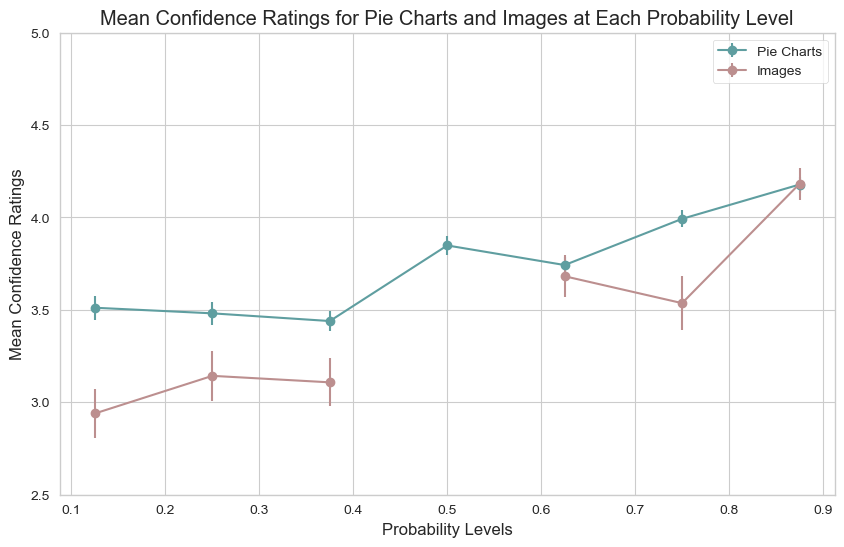

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')


all_pie_categories = [
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'",
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

mean_confidence_ratings_pie = []
mean_confidence_ratings_images = []

std_errors_pie = []
std_errors_images = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    image_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(experiential_image)]
    
    mean_confidence_pie = pie_df['confidenceLevelsArrayEXP'].mean()
    std_error_pie = pie_df['confidenceLevelsArrayEXP'].sem()
    mean_confidence_ratings_pie.append(mean_confidence_pie)
    std_errors_pie.append(std_error_pie)
    
    mean_confidence_image = image_df['confidenceLevelsArrayEXP'].mean()
    std_error_image = image_df['confidenceLevelsArrayEXP'].sem()
    mean_confidence_ratings_images.append(mean_confidence_image)
    std_errors_images.append(std_error_image)

plt.style.use('ggplot')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plt.errorbar(prob_levels, mean_confidence_ratings_pie, yerr=std_errors_pie, marker='o', linestyle='-', label='Pie Charts', color='cadetblue')
plt.errorbar(prob_levels, mean_confidence_ratings_images, yerr=std_errors_images, marker='o', linestyle='-', label='Images', color='rosybrown')
plt.xlabel('Probability Levels')
plt.ylabel('Mean Confidence Ratings')
plt.title('Mean Confidence Ratings for Pie Charts and Images at Each Probability Level')
plt.grid(True)
plt.ylim(2.5, 5.0)
plt.legend()
plt.show()


### Mean Confidence Ratings. Are there significant differences between the mean confidence ratings for pie charts and Experiential Images for each proability level? Kruskall Wallis, Dunn's post hoc test, bonferroni correction ###
#### Choice of Non-Parametric Test ####

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scikit_posthocs as sp

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')

all_pie_categories = [
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'",
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
]

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]
prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

confidence_ratings_pie = {prob_level: [] for prob_level in prob_levels}
confidence_ratings_images = {prob_level: [] for prob_level in prob_levels}

table_data = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    image_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(experiential_image)]
    confidence_ratings_pie[prob_level].extend(pie_df['confidenceLevelsArrayEXP'])
    confidence_ratings_images[prob_level].extend(image_df['confidenceLevelsArrayEXP'])

    # Kruskal-Wallis test for probability level
    statistic, p_value = stats.kruskal(
        confidence_ratings_pie[prob_level],
        confidence_ratings_images[prob_level]
    )

    if len(confidence_ratings_pie[prob_level]) >= 3 and len(confidence_ratings_images[prob_level]) >= 3:
        data = {
            'Confidence Ratings': confidence_ratings_pie[prob_level] + confidence_ratings_images[prob_level],
            'Category': ['Pie'] * len(confidence_ratings_pie[prob_level]) + ['Image'] * len(confidence_ratings_images[prob_level])
        }
        
        df_posthoc = pd.DataFrame(data)
        
        posthoc_result = sp.posthoc_dunn(df_posthoc, val_col='Confidence Ratings', group_col='Category', p_adjust='bonferroni')
        
        if posthoc_result.iloc[0, 1] < 0.05:
            category_difference = "Image vs. Pie (Image)"
        elif posthoc_result.iloc[1, 0] < 0.05:
            category_difference = "Image vs. Pie (Image)"
        else:
            category_difference = "Image vs. Pie (Image)"
        
        table_data.append({
            'Category Difference': category_difference,
            'Probability Level': prob_level,
            'Kruskal-Wallis P-value': p_value,
        })
    else:
        table_data.append({
            'Category Difference': "No significant difference",
            'Probability Level': prob_level,
            'Kruskal-Wallis P-value': p_value,
        })

table_df = pd.DataFrame(table_data)
print(table_df)


         Category Difference  Probability Level  Kruskal-Wallis P-value
0      Image vs. Pie (Image)              0.125                0.000034
1      Image vs. Pie (Image)              0.250                0.028949
2      Image vs. Pie (Image)              0.375                0.007681
3  No significant difference              0.500                     NaN
4      Image vs. Pie (Image)              0.625                0.795524
5      Image vs. Pie (Image)              0.750                0.011733
6      Image vs. Pie (Image)              0.875                0.987697


### Confidence Ratings by Probability Level for pies, Kruskall Wallis, Dunn's posthoc, bonferroni correction ###

Kruskal-Wallis Test:
Chi-Square Statistic: 134.96
P-Value: 0.0000

Dunn's Post Hoc Test (Bonferroni adjusted p-values):
              1             2             3         4             5  \
1  1.000000e+00  1.000000e+00  2.717863e-01  0.470735  1.000000e+00   
2  1.000000e+00  1.000000e+00  1.000000e+00  0.002371  3.267887e-01   
3  2.717863e-01  1.000000e+00  1.000000e+00  0.000005  4.374819e-03   
4  4.707349e-01  2.371214e-03  5.450496e-06  1.000000  1.000000e+00   
5  1.000000e+00  3.267887e-01  4.374819e-03  1.000000  1.000000e+00   
6  4.131619e-04  4.008105e-08  6.269196e-12  0.672052  7.041977e-03   
7  4.665724e-10  6.441324e-16  1.160736e-20  0.000024  1.153217e-08   

              6             7  
1  4.131619e-04  4.665724e-10  
2  4.008105e-08  6.441324e-16  
3  6.269196e-12  1.160736e-20  
4  6.720524e-01  2.351121e-05  
5  7.041977e-03  1.153217e-08  
6  1.000000e+00  8.244415e-02  
7  8.244415e-02  1.000000e+00  


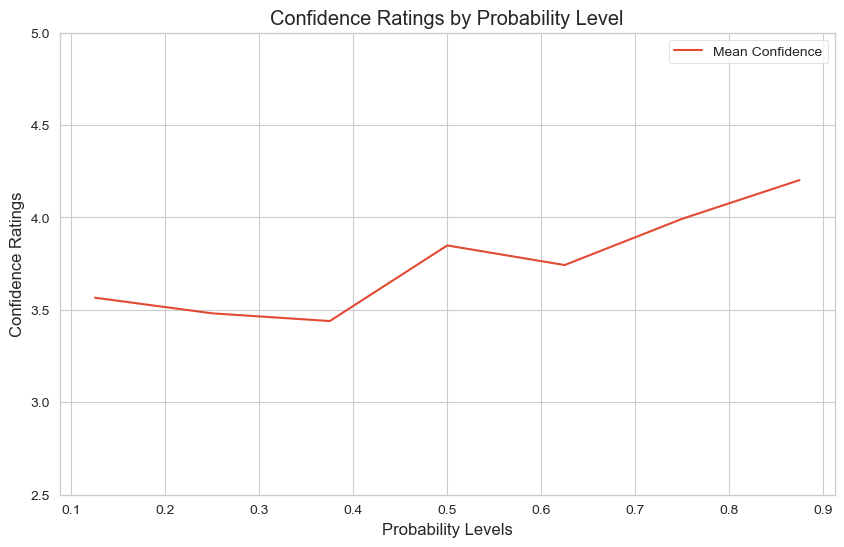

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')


all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
    ]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
confidence_ratings_by_level = []

mean_confidence_ratings_pie = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    confidence_ratings = pie_df['confidenceLevelsArrayEXP'].values
    confidence_ratings_by_level.append(confidence_ratings)
    
    mean_confidence_pie = pie_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings_pie.append(mean_confidence_pie)


# Kruskal-Wallis
kw_statistic, kw_p_value = stats.kruskal(*confidence_ratings_by_level)
print(f"Kruskal-Wallis Test:")
print(f"Chi-Square Statistic: {kw_statistic:.2f}")
print(f"P-Value: {kw_p_value:.4f}")

posthoc_results = posthoc_dunn(confidence_ratings_by_level, p_adjust='bonferroni')
print("\nDunn's Post Hoc Test (Bonferroni adjusted p-values):")
print(posthoc_results)

plt.style.use('ggplot')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(prob_levels, mean_confidence_ratings_pie, linestyle='-', label='Mean Confidence')  #marker='o'
plt.xlabel('Probability Levels')
plt.ylabel('Confidence Ratings')
plt.title('Confidence Ratings by Probability Level')
plt.grid(True)
plt.legend()
plt.ylim(2.5, 5.0)
plt.show()


Kruskal-Wallis Test:
Chi-Square Statistic: nan
P-Value: nan

Dunn's Post Hoc Test (Bonferroni adjusted p-values):
              1             2             3         5         6             7
1  1.000000e+00  1.000000e+00  1.000000e+00  0.001601  0.005978  2.678866e-10
2  1.000000e+00  1.000000e+00  1.000000e+00  0.086232  0.233123  3.687086e-07
3  1.000000e+00  1.000000e+00  1.000000e+00  0.022383  0.068539  2.730898e-08
5  1.600779e-03  8.623174e-02  2.238300e-02  1.000000  1.000000  6.604458e-02
6  5.978367e-03  2.331226e-01  6.853922e-02  1.000000  1.000000  1.696211e-02
7  2.678866e-10  3.687086e-07  2.730898e-08  0.066045  0.016962  1.000000e+00


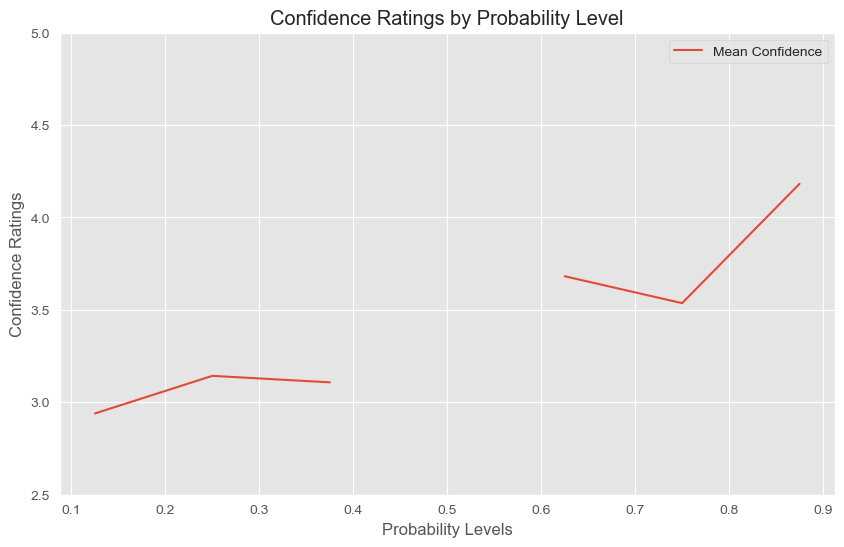

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
confidence_ratings_by_level = []

mean_confidence_ratings_images = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    im_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(experiential_image)]
    confidence_ratings = im_df['confidenceLevelsArrayEXP'].values
    confidence_ratings_by_level.append(confidence_ratings)
    
    mean_confidence_image = im_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings_images.append(mean_confidence_image)


# Kruskal-Wallis
kw_statistic, kw_p_value = stats.kruskal(*confidence_ratings_by_level)
print(f"Kruskal-Wallis Test:")
print(f"Chi-Square Statistic: {kw_statistic:.2f}")
print(f"P-Value: {kw_p_value:.4f}")

posthoc_results = posthoc_dunn(confidence_ratings_by_level, p_adjust='bonferroni')
print("\nDunn's Post Hoc Test (Bonferroni adjusted p-values):")
print(posthoc_results)

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.plot(prob_levels, mean_confidence_ratings_images, linestyle='-', label='Mean Confidence')  #marker='o'
plt.xlabel('Probability Levels')
plt.ylabel('Confidence Ratings')
plt.title('Confidence Ratings by Probability Level')
plt.grid(True)
plt.legend()
plt.ylim(2.5, 5.0)
plt.show()


In [55]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
     "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
     "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]


prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

df = df[df['SubID'] != 3]

mean_confidence_ratings_pie = []
mean_confidence_ratings_image = []


std_confidence_ratings_pie = []
std_confidence_ratings_image = []


for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['confidenceLevelsArrayEXP', 'accurate_rating'])
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    im_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(experiential_image)]

    mean_confidence_pie = pie_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings_pie.append(mean_confidence_pie)

    mean_confidence_image = im_df['confidenceLevelsArrayEXP'].mean()
    mean_confidence_ratings_image.append(mean_confidence_image)


    std_confidence_pie = pie_df['confidenceLevelsArrayEXP'].std()
    std_confidence_ratings_pie.append(std_confidence_pie)

    std_confidence_image = im_df['confidenceLevelsArrayEXP'].std()
    std_confidence_ratings_image.append(std_confidence_image)

for i, prob_level in enumerate(prob_levels):
    print(f"Probability Level -Pie: {prob_level}:")
    print(f"Probability Level -Image: {prob_level}:")

    print(f"Mean Confidence Rating -Pie: {mean_confidence_ratings_pie[i]:.2f}")
    print(f"Mean Confidence Rating -Image: {mean_confidence_ratings_image[i]:.2f}")

    print(f"Standard Deviation -Pie: {std_confidence_ratings_pie[i]:.2f}")
    print(f"Standard Deviation -Image: {std_confidence_ratings_image[i]:.2f}")

    print()
    print()



Probability Level -Pie: 0.125:
Probability Level -Image: 0.125:
Mean Confidence Rating -Pie: 3.48
Mean Confidence Rating -Image: 2.89
Standard Deviation -Pie: 1.06
Standard Deviation -Image: 1.05


Probability Level -Pie: 0.25:
Probability Level -Image: 0.25:
Mean Confidence Rating -Pie: 3.45
Mean Confidence Rating -Image: 3.10
Standard Deviation -Pie: 1.05
Standard Deviation -Image: 1.08


Probability Level -Pie: 0.375:
Probability Level -Image: 0.375:
Mean Confidence Rating -Pie: 3.40
Mean Confidence Rating -Image: 3.05
Standard Deviation -Pie: 0.87
Standard Deviation -Image: 1.03


Probability Level -Pie: 0.5:
Probability Level -Image: 0.5:
Mean Confidence Rating -Pie: 3.84
Mean Confidence Rating -Image: nan
Standard Deviation -Pie: 0.89
Standard Deviation -Image: nan


Probability Level -Pie: 0.625:
Probability Level -Image: 0.625:
Mean Confidence Rating -Pie: 3.73
Mean Confidence Rating -Image: 3.68
Standard Deviation -Pie: 0.71
Standard Deviation -Image: 0.95


Probability Level 

### TO DO:
- Replicate Garcia Analysis:
1. Modules
2. Helper Functions
3. Test for perfromance above chance 
4. Difficult vs. Easy chhoice problems pairwise t-tests
5. Test for performance within experiments across conditions
6. Test for performance increase
7. Mean accuracy
8. Slope increase 
9. Slope comparisons

Goal: Getting Slopes

## Correlation coefficients, linear vs polynomial model building ##

0.8294245209272606


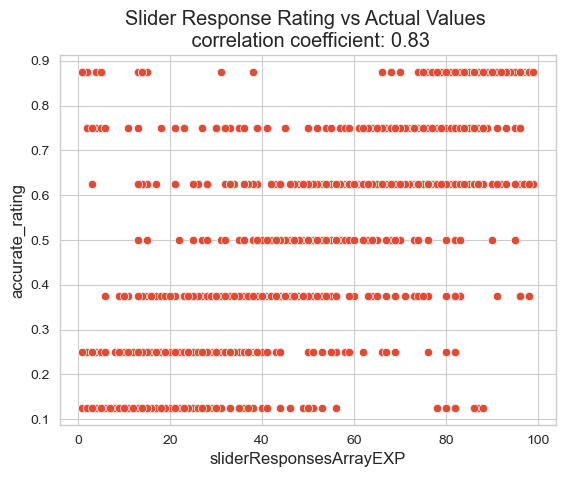

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')


corr1 = df["sliderResponsesArrayEXP"].corr(df["accurate_rating"])
print(corr1)

sns.scatterplot(x="sliderResponsesArrayEXP", y="accurate_rating", data = df)
plt.title(f'Slider Response Rating vs Actual Values \n correlation coefficient: {corr1:.2f}')
plt.show()

# there's a linear relationship, moderately strong, between sliderResponsesArrayEXP and accurate_rating


##### building a predictor using regression models (linear and polynomial ?) with different degrees to predict the accurate_rating based on the slider responses. We can evaluate each model splitting data into multiple folds folds. We can compare and select the best model that fits the data using e.g., MSE and R^2. We can then conclude whether the relation between the predictor and the target variables is lienar or polynomial #####


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')

df = df[(df['SubID'] != 3) & (df['SubID'] != 18)]

df['sliderResponsesArrayEXP'] = df['sliderResponsesArrayEXP'] / 100

df = df[['sliderResponsesArrayEXP', 'accurate_rating']]

df.dropna(inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['sliderResponsesArrayEXP']], df[['accurate_rating']],
                                                    test_size=0.25, random_state=42)

results = []

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results.append(('Linear Regression', mse, r2, y_test, y_pred))

# Degrees 1,2,3,4,5,6,7,8,9,10
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append(('Polynomial Regression (degree = {})'.format(degree), mse, r2, y_test, y_pred))

for name, mse, r2, y_test, y_pred in results:
    print(name)
    print('MSE:', mse)
    print('R^2:', r2)
    print('')


Linear Regression
MSE: 0.01276176413596623
R^2: 0.808711605654306

Polynomial Regression (degree = 1)
MSE: 0.01276176413596623
R^2: 0.808711605654306

Polynomial Regression (degree = 2)
MSE: 0.012785298861804123
R^2: 0.8083588393855572

Polynomial Regression (degree = 3)
MSE: 0.012645513168732605
R^2: 0.8104541124602876

Polynomial Regression (degree = 4)
MSE: 0.01262421423264688
R^2: 0.8107733660714422

Polynomial Regression (degree = 5)
MSE: 0.012604556678180586
R^2: 0.8110680167161775

Polynomial Regression (degree = 6)
MSE: 0.012607262851693612
R^2: 0.8110274533911846

Polynomial Regression (degree = 7)
MSE: 0.012612587036728316
R^2: 0.8109476482172575

Polynomial Regression (degree = 8)
MSE: 0.012616298802590367
R^2: 0.8108920118863887

Polynomial Regression (degree = 9)
MSE: 0.012610082674660171
R^2: 0.8109851865539461

Polynomial Regression (degree = 10)
MSE: 0.012646736697289024
R^2: 0.8104357727691212

Polynomial Regression (degree = 15)
MSE: 0.012589513979798647
R^2: 0.811293

## can adding more features (confidence ratings) improve our models accuracy?? ##
- How well can participant predictions and confidence ratings explain the accurate ratings of images?
- Does increasing the polynomial degree improve the model's predictive performance?
- Which polynomial degree provides the best fit to the data based on MSE and R2?
- Are there any patterns or trends in the residuals, and do they meet the assumptions of linear regression?
- How well do participants' predicted ratings align with the actual ratings?
- Does the addition of polynomial features improve the model's performance in capturing the relationship between predictors and the target variable?


yes, adding confidence responses as a predictor does imporve our models accuracy but only by very little, it also selectes a polynomial with less degrees (=6)

### Correlation between Slider response array and accurate rating for pies and images individually ###

0.859861158605576


C:\Users\Asus\AppData\Local\Temp\ipykernel_24428\4114542448.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_df['sliderResponsesArrayEXP'] = df['sliderResponsesArrayEXP'] / 100
C:\Users\Asus\AppData\Local\Temp\ipykernel_24428\4114542448.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im_df['sliderResponsesArrayEXP'] = df['sliderResponsesArrayEXP'] / 100


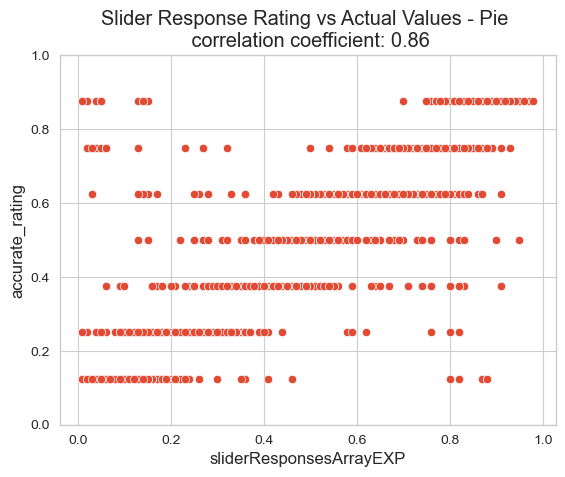

0.7096519044229567


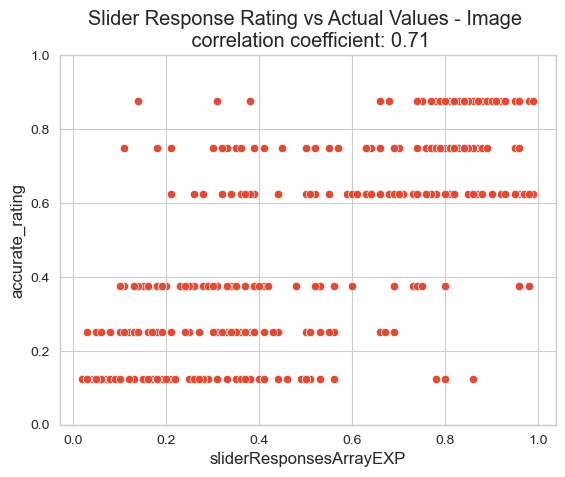

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')



all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
     "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
     "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]

experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]



pie_df = df[df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
im_df = df[df['selectedImageNamesArrayEXP'].isin(experiential_image)]

pie_df['sliderResponsesArrayEXP'] = df['sliderResponsesArrayEXP'] / 100
im_df['sliderResponsesArrayEXP'] = df['sliderResponsesArrayEXP'] / 100



corr_pie = pie_df["sliderResponsesArrayEXP"].corr(pie_df["accurate_rating"])
print(corr_pie)
sns.scatterplot(x="sliderResponsesArrayEXP", y="accurate_rating", data = pie_df)
plt.title(f'Slider Response Rating vs Actual Values - Pie \n correlation coefficient: {corr_pie:.2f}')
plt.ylim(0, 1.0)
plt.show()


corr_im = im_df["sliderResponsesArrayEXP"].corr(im_df["accurate_rating"])
print(corr_im)
sns.scatterplot(x="sliderResponsesArrayEXP", y="accurate_rating", data = im_df)
plt.title(f'Slider Response Rating vs Actual Values - Image \n correlation coefficient: {corr_im:.2f}')
plt.ylim(0, 1.0)
plt.show()



## Pies ##

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

pie_df = df[df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]

pie_df['sliderResponsesArrayEXP'] = pie_df['sliderResponsesArrayEXP'] / 100
pie_df = pie_df[['sliderResponsesArrayEXP', 'accurate_rating']]
pie_df.dropna(inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pie_df[['sliderResponsesArrayEXP']], pie_df[['accurate_rating']],
                                                    test_size=0.25, random_state=42)

results = []

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results.append(('Linear Regression', mse, r2, y_test, y_pred))

# Degrees 1,2,3,4,5,6,7,8,9,10
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append(('Polynomial Regression (degree = {})'.format(degree), mse, r2, y_test, y_pred))

for name, mse, r2, y_test, y_pred in results:
    print(name)
    print('MSE:', mse)
    print('R^2:', r2)
    print('')

    #results
    #plt.figure(figsize=(8, 6))
    #plt.scatter(X_test, y_test, color='blue', label='actual')
    #plt.plot(X_test, y_pred, color='red', label='predicted')
    #plt.legend(loc='upper left')
    #plt.xlabel('Fuel Consumption Comb')
    #plt.ylabel('CO2 Emission')
    #plt.title(name)
    #plt.show()

    
    # residual
    #plt.figure(figsize=(8, 6))
    #sns.residplot(x=y_pred, y=y_test, color='blue')
    #plt.xlabel('Predicted Values')
    #plt.ylabel('Residuals')
    #plt.title(name)
    #plt.show()


    


Linear Regression
MSE: 0.008544244598181998
R^2: 0.8557118460989311

Polynomial Regression (degree = 1)
MSE: 0.008544244598182
R^2: 0.855711846098931

Polynomial Regression (degree = 2)
MSE: 0.008608707067922309
R^2: 0.8546232570905228

Polynomial Regression (degree = 3)
MSE: 0.008600032333589691
R^2: 0.854769748847407

Polynomial Regression (degree = 4)
MSE: 0.008596580450269176
R^2: 0.8548280414051721

Polynomial Regression (degree = 5)
MSE: 0.008632938980934835
R^2: 0.8542140485345303

Polynomial Regression (degree = 6)
MSE: 0.008634979101638771
R^2: 0.8541795966591511

Polynomial Regression (degree = 7)
MSE: 0.008599373208043413
R^2: 0.8547808796158639

Polynomial Regression (degree = 8)
MSE: 0.008574092699303532
R^2: 0.8552077959914243

Polynomial Regression (degree = 9)
MSE: 0.008572510678257865
R^2: 0.8552345118576999

Polynomial Regression (degree = 10)
MSE: 0.008578139927779973
R^2: 0.8551394497358167

Polynomial Regression (degree = 15)
MSE: 0.008560438394691207
R^2: 0.855438

C:\Users\Asus\AppData\Local\Temp\ipykernel_24428\3252149848.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_df['sliderResponsesArrayEXP'] = pie_df['sliderResponsesArrayEXP'] / 100


Degree: 1 MSE: 0.00948948640343461 R2: 0.8472605286811922
Degree: 2 MSE: 0.009491024320700772 R2: 0.8472099346493367
Degree: 3 MSE: 0.009488950252285704 R2: 0.8472359693196811
Degree: 4 MSE: 0.00949231236917734 R2: 0.8471898878874727
Degree: 5 MSE: 0.009495193782521135 R2: 0.8471429798303557
Degree: 6 MSE: 0.009507580128925048 R2: 0.8469409592006215
Degree: 7 MSE: 0.009495685529142445 R2: 0.8471127222080181
Degree: 8 MSE: 0.009494051130850598 R2: 0.8471491627811648
Degree: 9 MSE: 0.00949904177406258 R2: 0.8470773007624446
Degree: 10 MSE: 0.009503168985209086 R2: 0.8470111095594481
Degree: 15 MSE: 0.009442919956489033 R2: 0.8480217566303281
Degree: 20 MSE: 0.00976368270160725 R2: 0.8425581076288757
Polynomial Regression Formula (Best Degree 15):
y = 0.00 + 23.92x^1 - 916.61x^2 + 17509.69x^3 - 190622.79x^4 + 1294449.70x^5 - 5780026.91x^6 + 17453188.94x^7 - 35843214.75x^8 + 48850227.86x^9 - 40160848.79x^10 + 12116511.94x^11 + 11318927.85x^12 - 14553942.26x^13 + 6638995.46x^14 - 1160262.19

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


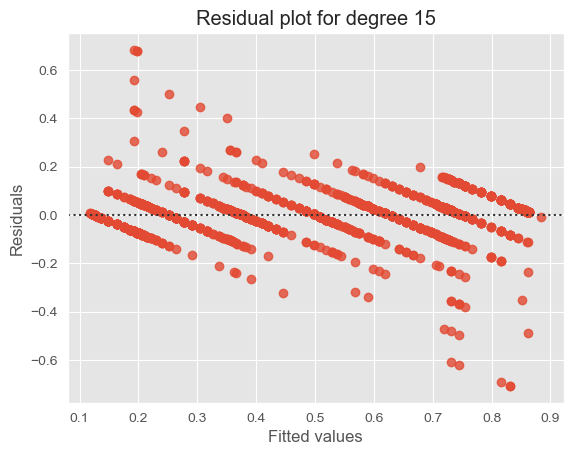

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


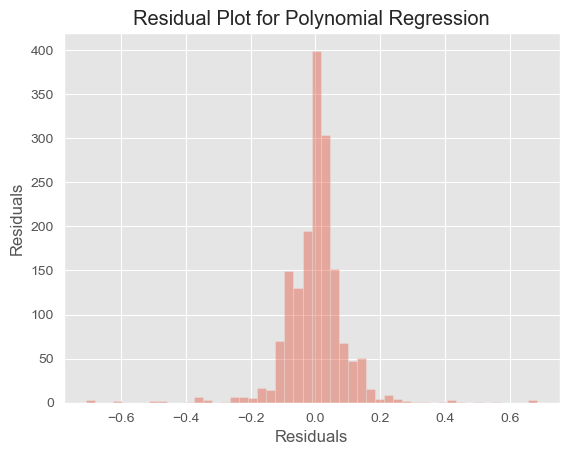

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pie_df = pie_df[['sliderResponsesArrayEXP', 'accurate_rating']]
pie_df.dropna(inplace=True)

X = pie_df['sliderResponsesArrayEXP'].values.reshape(-1, 1)
y = pie_df['accurate_rating'].values.reshape(-1, 1)

# degrees to be tested
degrees = [1,2,3,4,5,6,7,8,9,10,15,20]
results = []

# K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Initialization
    model = LinearRegression()
    mse_scores = []
    r2_scores = []
    
    #K-Fold cross-validation on initialized
    for train_index, test_index in kf.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    mean_mse = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    
    results.append((degree, mean_mse, mean_r2))

for degree, mse, r2 in results:
    print(f"Degree: {degree} MSE: {mse} R2: {r2}")

# Selection of the best model
best_degree, best_mse, best_r2 = min(results, key=lambda x: x[1])

# Fit the best-degree polynomial regression model
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Extract the coefficients of the polynomial features
coefficients = model.coef_[0]

# Create the formula string
formula = f"y = {coefficients[0]:.2f}"
for i in range(1, len(coefficients)):
    if coefficients[i] >= 0:
        formula += f" + {coefficients[i]:.2f}x^{i}"
    else:
        formula += f" - {abs(coefficients[i]):.2f}x^{i}"

print(f"Polynomial Regression Formula (Best Degree {best_degree}):")
print(formula)

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
residuals = y - y_pred
sns.residplot(y_pred, residuals)
plt.title(f"Residual plot for degree {best_degree}")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

sns.distplot(residuals, kde=False)
plt.title(f"Distribution plot for degree {best_degree}")
plt.xlabel("Residuals")
plt.ylabel("Residuals")
plt.title('Residual Plot for Polynomial Regression')
plt.show()

## Images ##

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


#filter for pie images only
im_df = df[df['selectedImageNamesArrayEXP'].isin(experiential_image)]

im_df['sliderResponsesArrayEXP'] = im_df['sliderResponsesArrayEXP'] / 100
im_df = im_df[['sliderResponsesArrayEXP', 'accurate_rating']]
im_df.dropna(inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(im_df[['sliderResponsesArrayEXP']], im_df[['accurate_rating']],
                                                    test_size=0.25, random_state=42)

results = []

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results.append(('Linear Regression', mse, r2, y_test, y_pred))

# Degrees 1,2,3,4,5,6,7,8,9,10
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append(('Polynomial Regression (degree = {})'.format(degree), mse, r2, y_test, y_pred))

for name, mse, r2, y_test, y_pred in results:
    print(name)
    print('MSE:', mse)
    print('R^2:', r2)
    print('')

    #results
    #plt.figure(figsize=(8, 6))
    #plt.scatter(X_test, y_test, color='blue', label='actual')
    #plt.plot(X_test, y_pred, color='red', label='predicted')
    #plt.legend(loc='upper left')
    #plt.xlabel('Fuel Consumption Comb')
    #plt.ylabel('CO2 Emission')
    #plt.title(name)
    #plt.show()

    
    # residual
    #plt.figure(figsize=(8, 6))
    #sns.residplot(x=y_pred, y=y_test, color='blue')
    #plt.xlabel('Predicted Values')
    #plt.ylabel('Residuals')
    #plt.title(name)
    #plt.show()


Linear Regression
MSE: 0.03367401058020776
R^2: 0.49831569477009696

Polynomial Regression (degree = 1)
MSE: 0.03367401058020776
R^2: 0.4983156947700971

Polynomial Regression (degree = 2)
MSE: 0.03424148181546478
R^2: 0.4898613583993291

Polynomial Regression (degree = 3)
MSE: 0.03317870824444329
R^2: 0.5056948398114898

Polynomial Regression (degree = 4)
MSE: 0.03152965956370284
R^2: 0.5302628026835396

Polynomial Regression (degree = 5)
MSE: 0.03160521951904628
R^2: 0.5291370905082885

Polynomial Regression (degree = 6)
MSE: 0.03170884158310063
R^2: 0.5275933016243428

Polynomial Regression (degree = 7)
MSE: 0.03162354845048797
R^2: 0.5288640212457476

Polynomial Regression (degree = 8)
MSE: 0.032837818077121356
R^2: 0.5107735115766263

Polynomial Regression (degree = 9)
MSE: 0.0327160883340853
R^2: 0.5125870734455162

Polynomial Regression (degree = 10)
MSE: 0.03397263356485369
R^2: 0.49386673065811726

Polynomial Regression (degree = 15)
MSE: 0.035043788042525094
R^2: 0.4779083882

C:\Users\Asus\AppData\Local\Temp\ipykernel_24428\2667948066.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im_df['sliderResponsesArrayEXP'] = im_df['sliderResponsesArrayEXP'] / 100


##

Is there a relationship between the absolute error (between the actual ratings and the slider responses) and the confidence ratings??

1. AE as distance
2. AE with directionality 

## SVM !!!!!!! ##
### remove outliers from RT, z score, check if longer rts for images also lead to "advantageous" decisions, does 'waiting' longer improve accuracy?? ###

#### directionality in RMSE, MAE ####
#### are people underestimating or overestimating higher/lower probabilities ####